# Visualization for HW5

Enter Your Name here : Mili Shah 

**Instructions**: This part of the assignment deals with visualizing the trends observed for the queries in the problem description. Run the associated cell for the specified query and convince yourself that what is presented in the output makes sense as per your expectations.

# RUN THE BELOW CELL FIRST for dependecy resolution, before running any subseqeuent cell.

In [1]:
#Import all Dependencies

# http://pandas.pydata.org/
# Documentation available at https://pandas.pydata.org/pandas-docs/stable/
# Open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
import pandas as pd

# http://matplotlib.org/
# De-facto standard
import matplotlib.pyplot as plt

# This module contains classes to support completely configurable tick locating and formatting
# https://matplotlib.org/api/ticker_api.html
import matplotlib.ticker as ticker

# Setup matplotlib to work inside the notebook using
%matplotlib inline

# Query 3 : Distribution of publication types

*Insert your query in the cell below* (please put the query in "markdown" as plain text and do not execute the sql query as code) :

------------- **INSERT QUERY 3 HERE** ----------------
drop table if exists types;

create temp table types(type_id INTEGER primary key, type_name text);
insert into types values(0, 'Journal Articles');
insert into types values(1, 'Conference and Workshop Papers');
insert into types values(3, 'Books and Thesis');

copy
(
	select type_name as type, count(papers.id) as publications
	from papers
		join venue on papers.venue = venue.id
		join types on venue.type = types.type_id
	where year != 0
	group by type_name
)
to '/tmp/papers_count_per_type.csv'
with delimiter ',' csv header;

drop table if exists types;

In [2]:
# File Statistics for Query 3 Answer 
# (where answer fileName of the query in the current directory is : "papers_count_per_type.csv")

# Read CSV (comma-separated) file into DataFrame
papers_count_per_type = pd.read_csv('papers_count_per_type.csv')

# Concise summary of a DataFrame.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
papers_count_per_type.info()


# Table Answer of the query
# Return the first n rows.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
papers_count_per_type.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
type            3 non-null object
publications    3 non-null int64
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


,type,publications
0,Journal Articles,1401693
1,Books and Thesis,6974
2,Conference and Workshop Papers,1740812


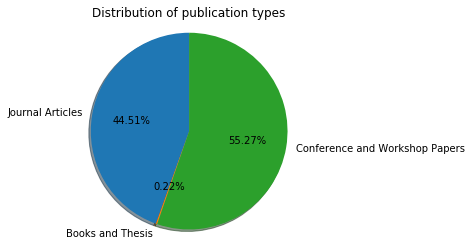

In [3]:
# Visualization for Query 3 (Pie Chart)


# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots
# Create a figure and one subplot.
fig, ax = plt.subplots()
# Set a title for the axes.
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.set_title.html
ax.set_title('Distribution of publication types')
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html?highlight=matplotlib%20pyplot%20pie
ax.pie(papers_count_per_type['publications'], labels=papers_count_per_type['type'], autopct='%1.2f%%', shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
# Plot lines and/or markers to the Axes.
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html
# By adding a semicolon at the end, the output is suppressed.
ax.plot();

# Query 4 : Publications by type per year

*Insert your query in the cell below* (please put the query in "markdown" as plain text and do not execute the sql query as code) :

------------- **INSERT QUERY 4 HERE** ----------------
create extension tablefunc;

copy(
with ans as
(
select *
from crosstab
(
	'select year, type, count(papers.id) as publications
	from papers
		join venue on papers.venue = venue.id
	where year != 0
	group by year, type
	order by year, type',
	'select distinct type
	from venue
	order by type'
) as res(year integer, "journal_articles_publications"	 integer,
		"conference_and_workshop_papers_publications" integer,
		"books_and_thesis_publications" integer
		)
)
select year,
	journal_articles_publications,
	coalesce(conference_and_workshop_papers_publications, 0)
		as conference_and_workshop_papers_publications,
	coalesce(books_and_thesis_publications, 0)
		as books_and_thesis_publications
from ans

)
to '/tmp/papers_count_per_type_per_year.csv'
with delimiter ',' csv header;
;

In [4]:
# File Statistics for Query 4 Answer 
# (where answer fileName of the query in the current directory is : "papers_count_per_type_per_year.csv")

papers_count_per_type_per_year = pd.read_csv('papers_count_per_type_per_year.csv')

papers_count_per_type_per_year.info()
papers_count_per_type_per_year.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
year                                           81 non-null int64
journal_articles_publications                  81 non-null int64
conference_and_workshop_papers_publications    81 non-null int64
books_and_thesis_publications                  81 non-null int64
dtypes: int64(4)
memory usage: 2.6 KB


,year,journal_articles_publications,conference_and_workshop_papers_publications,books_and_thesis_publications
0,1936,12,0,0
1,1937,15,0,0
2,1938,10,0,0
3,1939,18,0,0
4,1940,10,0,0


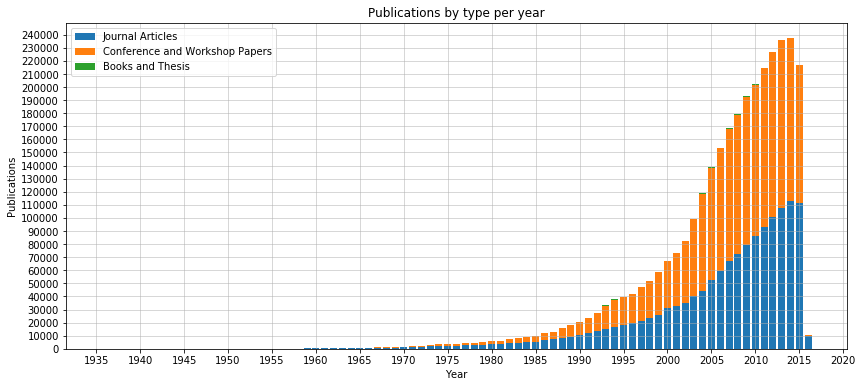

In [5]:
# Visualization for Query 4 (Stacked-bar Graph)

fig, ax = plt.subplots(figsize=(14, 6))

p1 = ax.bar(papers_count_per_type_per_year['year'], papers_count_per_type_per_year['journal_articles_publications'])
p2 = ax.bar(papers_count_per_type_per_year['year'], papers_count_per_type_per_year['conference_and_workshop_papers_publications'], bottom=papers_count_per_type_per_year['journal_articles_publications'])
p3 = ax.bar(papers_count_per_type_per_year['year'], papers_count_per_type_per_year['books_and_thesis_publications'], bottom=papers_count_per_type_per_year['journal_articles_publications'] + papers_count_per_type_per_year['conference_and_workshop_papers_publications'])

ax.set_xlabel('Year')
ax.set_ylabel('Publications')
ax.set_title('Publications by type per year')
ax.legend((p1[0], p2[0], p3[0]), ('Journal Articles', 'Conference and Workshop Papers', 'Books and Thesis'))
# Control the major tick label formats.
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10000))
# Turn the axes grids on or off.
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.grid.html
ax.grid(axis='both', linestyle='-', linewidth=0.5)
ax.plot();

# Query 5 : Publications per coauthors between 1995 and 2015

*Insert your query in the cell below* (please put the query in "markdown" as plain text and do not execute the sql query as code) :

------------- **INSERT QUERY 5 HERE** ----------------
create extension tablefunc;

copy(
with ans as
(
select *
from crosstab
(
	'
	with coauthors
	as (select paperid, count(authid) as coauthors
		from paperauths
		group by paperid)
	, some_coauthors
	as (select paperid, coauthors, year
		from coauthors
			join papers on paperid = papers.id
			join venue on papers.venue = venue.id
		where year >= 1995 and year <= 2015)
	select coauthors, year, count(paperid)
	from some_coauthors
	group by coauthors, year
	order by coauthors, year',
	'
	with coauthors
	as (select paperid, count(authid) as coauthors
		from paperauths
		group by paperid)
	, some_coauthors
	as (select paperid, coauthors, year
		from coauthors
			join papers on paperid = papers.id
			join venue on papers.venue = venue.id
		where year >= 1995 and year <= 2015)
	select distinct year
	from some_coauthors
	order by year'
) as res(coauthors integer, year_1995 integer, year_1996 integer,
		year_1997 integer, year_1998 integer, year_1999 integer,
		year_2000 integer, year_2001 integer, year_2002 integer,
		year_2003 integer, year_2004 integer, year_2005 integer,
		year_2006 integer, year_2007 integer, year_2008 integer,
		year_2009 integer, year_2010 integer, year_2011 integer,
		year_2012 integer, year_2013 integer, year_2014 integer,
		year_2015 integer)

)
select coauthors as coauthors,
		coalesce(year_1995, 0) as year_1995,
		coalesce(year_1996, 0) as year_1996,
		coalesce(year_1997, 0) as year_1997,
		coalesce(year_1998, 0) as year_1998,
		coalesce(year_1999, 0) as year_1999,
		coalesce(year_2000, 0) as year_2000,
		coalesce(year_2001, 0) as year_2001,
		coalesce(year_2002, 0) as year_2002,
		coalesce(year_2003, 0) as year_2003,
		coalesce(year_2004, 0) as year_2004,
		coalesce(year_2005, 0) as year_2005,
		coalesce(year_2006, 0) as year_2006,
		coalesce(year_2007, 0) as year_2007,
		coalesce(year_2008, 0) as year_2008,
		coalesce(year_2009, 0) as year_2009,
		coalesce(year_2010, 0) as year_2010,
		coalesce(year_2011, 0) as year_2011,
		coalesce(year_2012, 0) as year_2012,
		coalesce(year_2013, 0) as year_2013,
		coalesce(year_2014, 0) as year_2014,
		coalesce(year_2015, 0) as year_2015
from ans
)
to '/tmp/papers_count_per_coauthors_between_1995_and_2015.csv'
with delimiter ',' csv header;
;

In [6]:
# File Statistics for Query 4 Answer 
# (where answer fileName of the query in the current directory is : "papers_count_per_coauthors_between_1995_and_2015.csv")

papers_count_per_coauthors_between_1995_and_2015 = pd.read_csv('papers_count_per_coauthors_between_1995_and_2015.csv')

papers_count_per_coauthors_between_1995_and_2015.info()
papers_count_per_coauthors_between_1995_and_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 22 columns):
coauthors    77 non-null int64
year_1995    77 non-null int64
year_1996    77 non-null int64
year_1997    77 non-null int64
year_1998    77 non-null int64
year_1999    77 non-null int64
year_2000    77 non-null int64
year_2001    77 non-null int64
year_2002    77 non-null int64
year_2003    77 non-null int64
year_2004    77 non-null int64
year_2005    77 non-null int64
year_2006    77 non-null int64
year_2007    77 non-null int64
year_2008    77 non-null int64
year_2009    77 non-null int64
year_2010    77 non-null int64
year_2011    77 non-null int64
year_2012    77 non-null int64
year_2013    77 non-null int64
year_2014    77 non-null int64
year_2015    77 non-null int64
dtypes: int64(22)
memory usage: 13.3 KB


,coauthors,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,...,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,1,11511,12157,13013,13591,14953,16368,17227,17905,19929,...,24395,25786,25784,26275,26787,26536,26125,25803,24109,21673
1,2,14901,15840,17026,18621,20776,23672,25078,27677,32779,...,47390,51239,52987,56115,57311,59240,60739,60539,59336,51785
2,3,7939,8664,10153,11603,13394,15681,17250,20015,24728,...,41779,45742,49626,53510,55922,59672,62989,65004,65148,58817
3,4,2909,3297,4107,4831,5677,6828,7906,9465,12289,...,22573,25544,28679,31656,33936,37185,40364,43162,44753,41474
4,5,1105,1150,1490,1731,2100,2551,3024,3687,4878,...,9284,11071,12249,13798,15379,17190,19466,21561,22936,22351


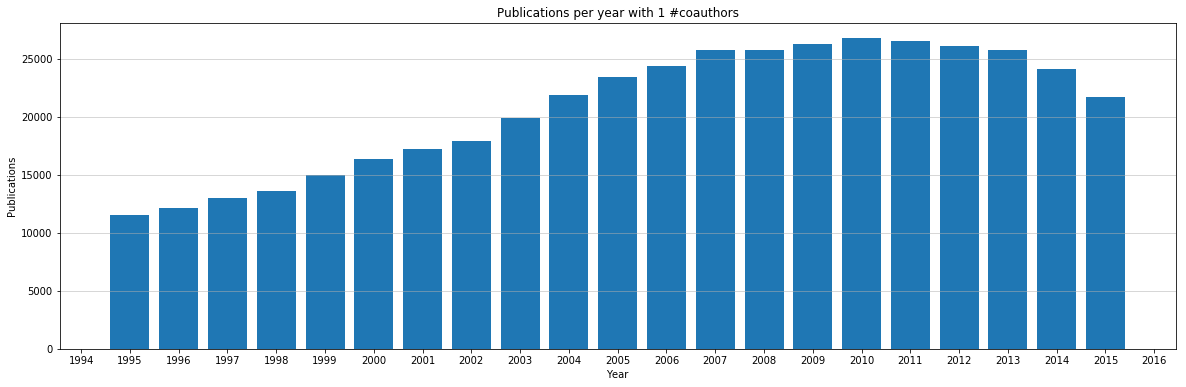

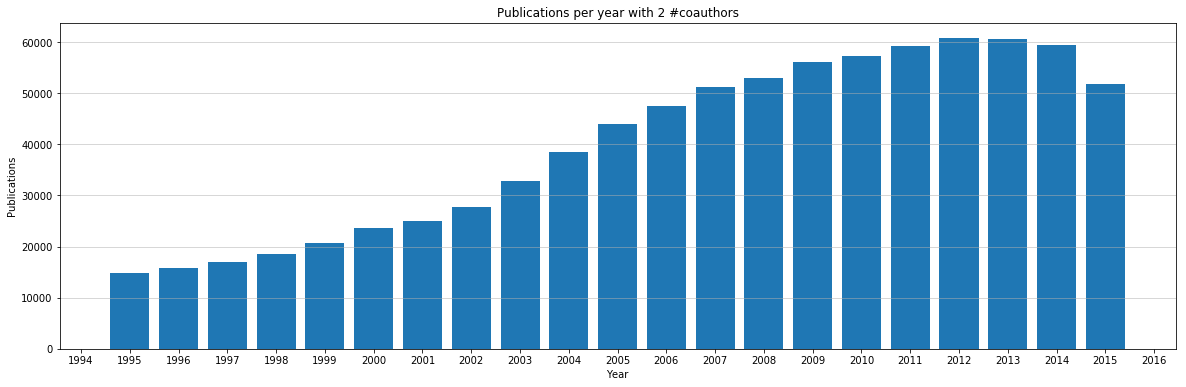

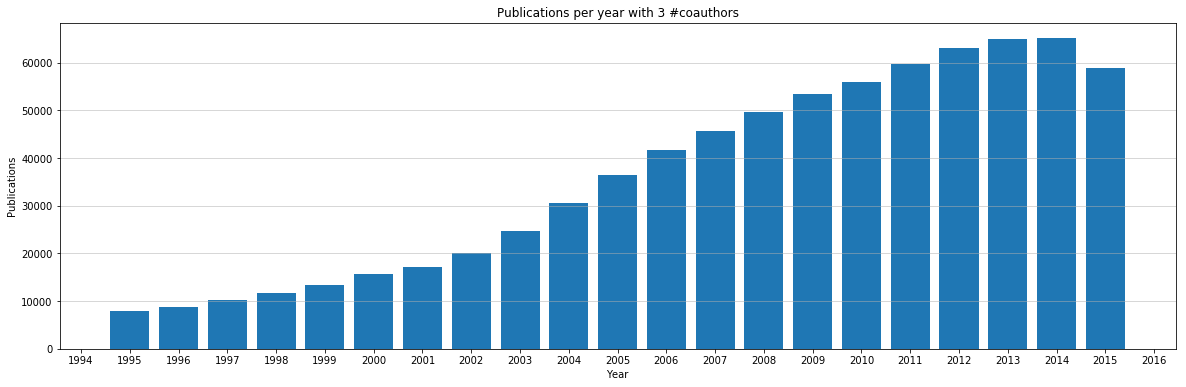

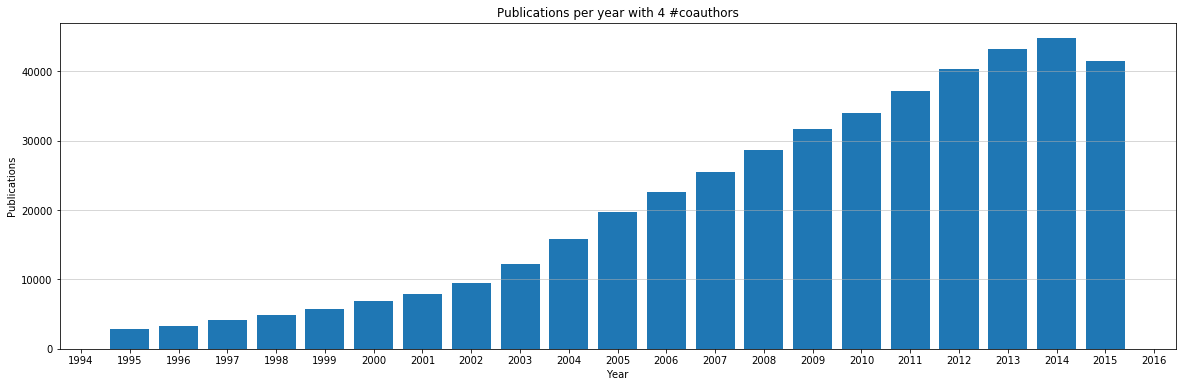

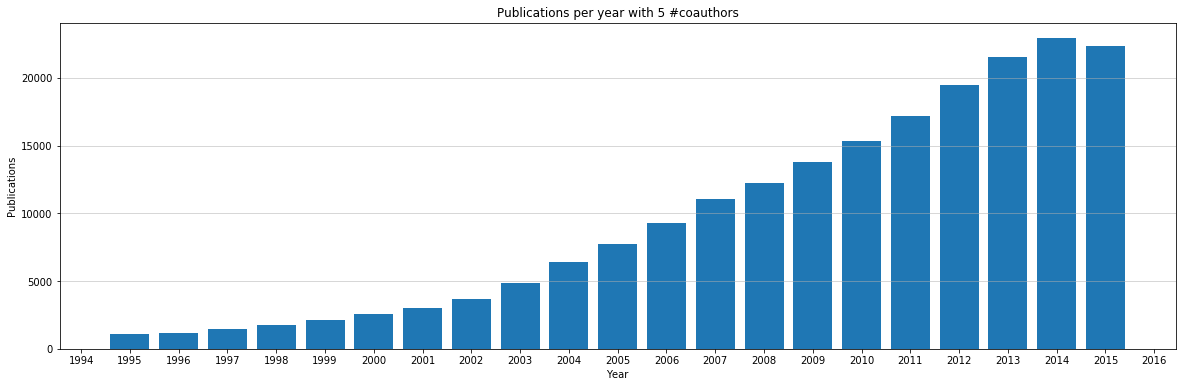

In [7]:
# Visualization for Query 5 (only between 1-5 #co-authors) (Multiple Bar plots)

x = list(range(1995, 2016))
author_ctr = 0
results_to_display = 5

for coauthors in papers_count_per_coauthors_between_1995_and_2015['coauthors']:
    h = papers_count_per_coauthors_between_1995_and_2015.loc[papers_count_per_coauthors_between_1995_and_2015['coauthors'] == coauthors].drop('coauthors', 1)
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.set_xlabel('Year')
    ax.set_ylabel('Publications')
    ax.set_title('Publications per year with %d #coauthors' % (coauthors,))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    ax.grid(axis='y', linestyle='-', linewidth=0.5)
    ax.bar(x, h.iloc[0].values)
    ax.plot();
    author_ctr += 1
    
    if author_ctr == results_to_display:
        break